Iteration:  1
Weights:  [0.01 0.01 0.02]


Iteration:  2
Weights:  [0.   0.01 0.02]


Iteration:  3
Weights:  [-0.01  0.01  0.02]


Iteration:  4
Weights:  [-0.01  0.03  0.02]


Learning Rate: 0.01
Weights: [-0.01  0.03  0.02]
Iterations: 5




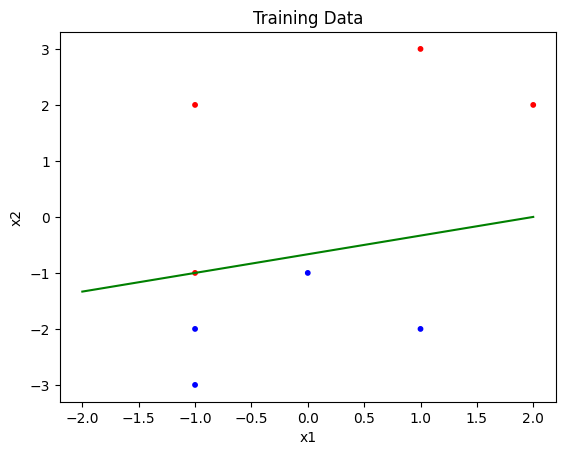

Iteration:  1
Weights:  [0.5 0.5 1. ]


Iteration:  2
Weights:  [0.  0.5 1. ]


Iteration:  3
Weights:  [-0.5  0.5  1. ]


Iteration:  4
Weights:  [-0.5  1.5  1. ]


Iteration:  5
Weights:  [-1.   1.   1.5]


Iteration:  6
Weights:  [-1.   1.5  1. ]


Learning Rate: 0.5
Weights: [-1.   1.5  1. ]
Iterations: 7




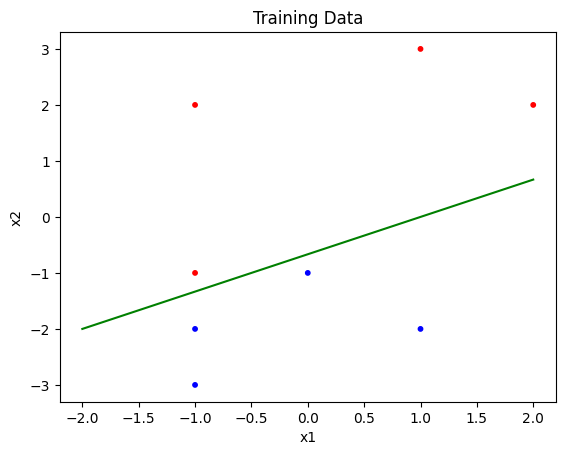

In [3]:
import numpy as np
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt


# Define the training data
X = np.array([[2, 2],
              [-1, -3],
              [-1, 2],
              [0, -1],
              [1, 3],
              [-1, -2],
              [1, -2],
              [-1, -1]])

y = np.array([1, 0, 1, 0, 1, 0, 0, 1])

global count 

count = 0

# Train Perceptron
def perceptron_train(X, y, learning_rate, max_iterations=1000):
    num_features = X.shape[1]
    num_samples = X.shape[0]
    weights = np.zeros(num_features + 1)  # Additional weight for bias term
    X = np.hstack((X,np.ones((num_samples, 1))))  # Add bias term

    #negate the values of X where y == 0
    for i in range(num_samples):
        if y[i] == 0:
            X[i] = -X[i]


    for _ in range(max_iterations):
        global count
        converged = True
        for i in range(num_samples):
            prediction = np.dot(X[i], weights)
            if prediction > 0:
                prediction = 1
            else:
                prediction = 0
            if prediction != 1:
                weights += learning_rate*X[i]
                converged = False
                     
        if converged:
            max_iterations = i+1
            break
        else:
            count += 1
            print("Iteration: ", count)
            print("Weights: ", weights)
            print("\n")

    return weights


learning_rates = [0.01,0.5]

for i in learning_rates:

    weights = perceptron_train(X, y,i)
    print(f"Learning Rate: {i}")
    print(f"Weights: {weights}")
    print(f"Iterations: {count+1}")
    count = 0
    print("\n")


    # Calculate slope and intercept for the decision boundary
    slope = -weights[0] / weights[1]
    intercept = -weights[2] / weights[1]

    # Generate x values for the decision boundary
    x_values = np.linspace(-2, 2, 100)  # Adjust based on your data range
 
    # Calculate corresponding y values
    y_values = slope * x_values + intercept

    # Plot the training data
    #make dot size smaller
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=10)
    # Plot the decision boundary
    plt.plot(x_values, y_values, color='green')

    plt.title("Training Data")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()







